# A Quick Start Tutorial

This tutorial offers a quick-start guide for using _BaySpec_ to fit a spectral model to gamma-ray data. It can be broadly divided into the following three sections:

- Data: The spectra from Fermi/GBM's NaI detector and BGO detector.
- Model: A simple cutoff power-law function.
- Fitting: Bayesian inference implemented using _emcee_(or _multinest_).

In [1]:
import numpy as np
from bayspec.model.local import *
from bayspec import DataUnit, Data, Infer, Plot

1. Load spectra and response data.

In [2]:
nai = DataUnit(
    src='./ME/me.src', 
    bkg='./ME/me.bkg', 
    rsp='./ME/me.rsp', 
    notc=[8, 900], 
    stat='pgstat', 
    grpg={'min_sigma': 2, 'max_bin': 10})

bgo = DataUnit(
    src='./HE/he.src', 
    bkg='./HE/he.bkg', 
    rsp='./HE/he.rsp', 
    notc=[300, 38000], 
    stat='pgstat', 
    grpg={'min_sigma': 2, 'max_bin': 10})

data = Data([('nai', nai), 
             ('bgo', bgo)])

print(data)

╒════════╤════════════════╤═════════════╤═════════════════════════════════╤════════╕
│  Name  │    Noticing    │  Statistic  │            Grouping             │  Time  │
╞════════╪════════════════╪═════════════╪═════════════════════════════════╪════════╡
│  nai   │   [[8, 900]]   │   pgstat    │ {'min_sigma': 2, 'max_bin': 10} │  None  │
├────────┼────────────────┼─────────────┼─────────────────────────────────┼────────┤
│  bgo   │ [[300, 38000]] │   pgstat    │ {'min_sigma': 2, 'max_bin': 10} │  None  │
╘════════╧════════════════╧═════════════╧═════════════════════════════════╧════════╛



2.Define spectral model.

In [3]:
model = cpl()
print(model)

cpl [add]
cutoff power law model
╒════════╤═════════════╤═════════════╤═════════╕
│  cfg#  │  Component  │  Parameter  │  Value  │
╞════════╪═════════════╪═════════════╪═════════╡
│   1    │     cpl     │  redshift   │    0    │
╘════════╧═════════════╧═════════════╧═════════╛
╒════════╤═════════════╤═════════════╤═════════╤═════════════╤══════════╕
│  par#  │  Component  │  Parameter  │  Value  │    Prior    │  Frozen  │
╞════════╪═════════════╪═════════════╪═════════╪═════════════╪══════════╡
│   1    │     cpl     │  $\alpha$   │   -1    │ unif(-8, 4) │  False   │
├────────┼─────────────┼─────────────┼─────────┼─────────────┼──────────┤
│   2    │     cpl     │ log$E_{c}$  │    2    │ unif(0, 4)  │  False   │
├────────┼─────────────┼─────────────┼─────────┼─────────────┼──────────┤
│   3    │     cpl     │   log$A$    │   -1    │ unif(-6, 5) │  False   │
╘════════╧═════════════╧═════════════╧═════════╧═════════════╧══════════╛



3.Run Bayesian inference.

In [4]:
infer = Infer([(data, model)])
print(infer)

╒════════╤══════════════╤═════════════╤═════════════╤═════════╕
│  cfg#  │  Expression  │  Component  │  Parameter  │  Value  │
╞════════╪══════════════╪═════════════╪═════════════╪═════════╡
│   1    │     cpl      │     cpl     │  redshift   │    0    │
╘════════╧══════════════╧═════════════╧═════════════╧═════════╛
╒════════╤══════════════╤═════════════╤═════════════╤═════════╤═════════════╕
│  par#  │  Expression  │  Component  │  Parameter  │  Value  │    Prior    │
╞════════╪══════════════╪═════════════╪═════════════╪═════════╪═════════════╡
│   1*   │     cpl      │     cpl     │  $\alpha$   │   -1    │ unif(-8, 4) │
├────────┼──────────────┼─────────────┼─────────────┼─────────┼─────────────┤
│   2*   │     cpl      │     cpl     │ log$E_{c}$  │    2    │ unif(0, 4)  │
├────────┼──────────────┼─────────────┼─────────────┼─────────┼─────────────┤
│   3*   │     cpl      │     cpl     │   log$A$    │   -1    │ unif(-6, 5) │
╘════════╧══════════════╧═════════════╧═════════════╧═══

In [5]:
post = infer.emcee(nstep=1000, resume=True, savepath='./quickstart')
print(post)

╒════════╤══════════════╤═════════════╤═════════════╤════════╤══════════╤════════╤══════════════════╕
│  par#  │  Expression  │  Component  │  Parameter  │  Mean  │  Median  │  Best  │    1sigma CI     │
╞════════╪══════════════╪═════════════╪═════════════╪════════╪══════════╪════════╪══════════════════╡
│   1    │     cpl      │     cpl     │  $\alpha$   │ -1.562 │  -1.563  │ -1.562 │ [-1.573, -1.552] │
├────────┼──────────────┼─────────────┼─────────────┼────────┼──────────┼────────┼──────────────────┤
│   2    │     cpl      │     cpl     │ log$E_{c}$  │ 2.691  │  2.691   │  2.69  │  [2.673, 2.708]  │
├────────┼──────────────┼─────────────┼─────────────┼────────┼──────────┼────────┼──────────────────┤
│   3    │     cpl      │     cpl     │   log$A$    │ -0.771 │  -0.771  │ -0.771 │ [-0.778, -0.765] │
╘════════╧══════════════╧═════════════╧═════════════╧════════╧══════════╧════════╧══════════════════╛
╒════════╤═════════╤═════════════╤════════════╤════════╕
│  Data  │  Model  │  Sta

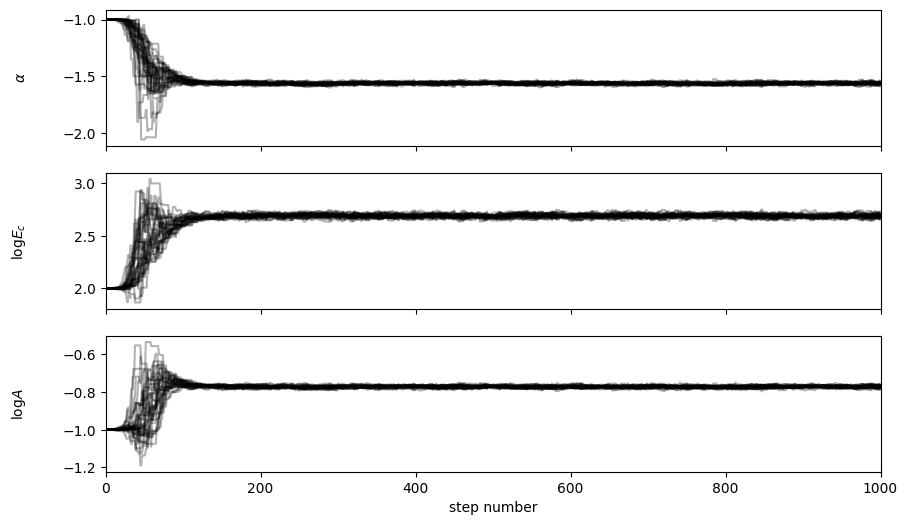

In [6]:
fig = Plot.emcee_walker(post)

In [7]:
fig = Plot.infer(post, style='CE', show=True)
fig.write_html('quickstart/ctsspec.html')

In [8]:
fig = Plot.infer(post, style='NE', show=True)
fig.write_html('quickstart/phtspec.html')

In [9]:
fig = Plot.post_corner(post, show=True)
fig.write_html('quickstart/corner.html')

In [10]:
earr = np.logspace(np.log10(0.5), 3, 100)

modelplot = Plot.model(ploter='plotly', style='vFv', CI=True)
fig = modelplot.add_model(model, E=earr, show=True)
fig.write_html('quickstart/model.html')

In [11]:
ergflux = model.best_ergflux(emin=10, emax=1000, ngrid=1000)
ergflux_sample = model.ergflux_sample(emin=10, emax=1000, ngrid=1000)

print(ergflux)
print(ergflux_sample)

8.372559070853753e-06
{'mean': np.float64(8.370170493341427e-06), 'median': np.float64(8.370485194756286e-06), 'Isigma': array([8.31018371e-06, 8.43161130e-06]), 'IIsigma': array([8.24553199e-06, 8.49107695e-06]), 'IIIsigma': array([8.14584946e-06, 8.54071562e-06])}
